In [221]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Model Evaluation

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [222]:
# Reading the csv
df = pd.read_csv("Leads.csv")

In [223]:
pd.set_option('display.max_columns', None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [224]:
# Checking the dataframe
df.shape

(9240, 37)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [226]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning


In [227]:
# Dropping Lead Number and Prospect ID as they dont matter in regression
df.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [228]:
#  Percentage Null
round((df.isna().sum()/df.shape[0])*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [229]:
# dropping columns with more than 40% null Values

df=df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [230]:
# Percentage Missing value
(df.isna().sum()/df.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [231]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

- We have converted select category to null value because "Select" simply means that the customer has not entered any value there so that way we can say "Select" is equivalent to null value in this case.

In [232]:
df.shape

(9240, 28)

In [233]:
df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [234]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

In [235]:
df['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [236]:
df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [237]:
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

In [238]:
round(df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [239]:
# Since this column only has 1 response, We can drop this column
df=df.drop("What matters most to you in choosing a course",axis=1)

In [240]:
df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [241]:
# # Since most of the responses are Unemployed, 
# We can replace the  missing vlaues 
# in this to unemployed
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

In [242]:
df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [243]:
df["Country"]=df["Country"].replace(np.nan,'India')

In [244]:
df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [245]:
df.City=df.City.replace(np.nan,'Mumbai')

In [246]:
(df.isna().sum()/df.shape[0])*100

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Country                                     0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [247]:
df.dropna(inplace=True)

In [248]:
df.isna().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content 

In [249]:
df.shape

(9074, 27)

In [250]:
# Removing a few columns not needed for our need
df.drop(["I agree to pay the amount through cheque","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content"],axis=1)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,No,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,wrong number given,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,No,No,No,No,No,No,No,invalid number,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,No,No,No,No,No,No,No,Will revert after reading the email,Other Metro Cities,No,SMS Sent


In [251]:
# 
cat_var = [x for x in df.select_dtypes(include = "object").columns]
for x in cat_var:
    print(df[x].value_counts())

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
C

In [252]:
# Country
df.Country.value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [253]:
l = list(set([x for x in df.Country]))
l = [x for x in l if x not in ["India"]]
df["Country"] = df["Country"].replace(l , "Outside India")

In [254]:
df.Country.value_counts()

India            8787
Outside India     287
Name: Country, dtype: int64

In [255]:
# Checking the Percentage of the rows remaining after cleaning
(len(df.index)/9240)*100

98.2034632034632

### Exploratory Data analysis

In [256]:
df.Converted.value_counts(normalize = True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

##  Univariate and Bivariate Analysis

### Analyzing the Converted Column:

In [257]:
sum(df["Converted"])/len(df["Converted"])

0.3785541106458012

### Inference for the "Converted" Column
- Lead Conversion rate is around 38%

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Country                                   9074 non-null   object 
 10  Specialization                      

### 1. Lead Origin

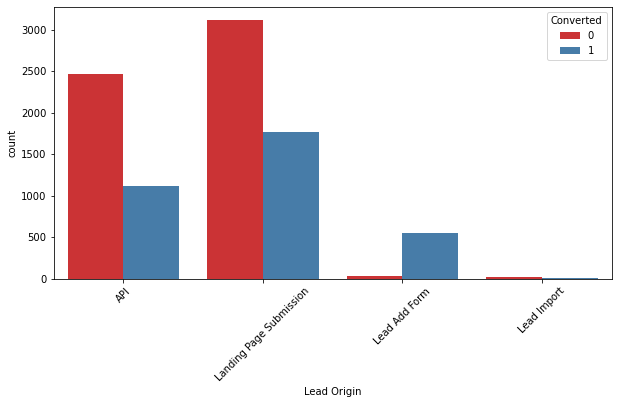

In [259]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

In [260]:
# Finding the percentage conversion for each Origin
df.groupby('Lead Origin')['Converted'].mean() * 100

Lead Origin
API                        31.162661
Landing Page Submission    36.171955
Lead Add Form              93.631670
Lead Import                30.000000
Name: Converted, dtype: float64

### Inferences for Lead Origin:

- API and Landing Page Submission have a conversion rate of 30-35%, but the number of leads originated from them is considerable.
- Lead Add Form has a conversion rate of more than 90%, but the number of leads is pretty low.
- Lead Import has a very low count as well as a low conversion rate, thus can be ignored.

To improve the overall lead conversion rate, we need to focus more on improving the lead conversion of "API" and "Landing Page Submission" origin and generate more leads from "Lead Add Form".


### 2. Lead Source

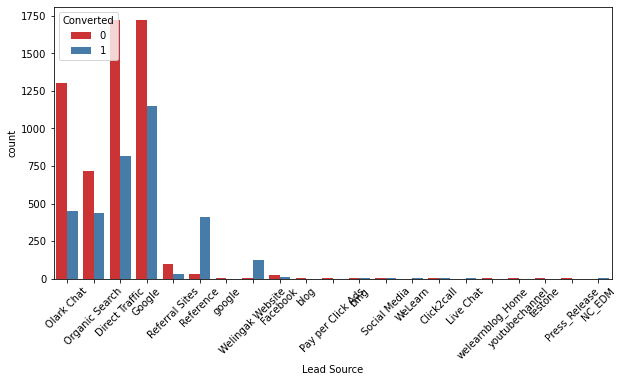

In [261]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

In [262]:
df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [263]:
# Replacing google with " Google"
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

In [264]:
# Finding the percentage conversion for each Source
df.groupby('Lead Source')['Converted'].mean() * 100

Lead Source
Click2call            75.000000
Direct Traffic        32.166732
Facebook              29.032258
Google                39.923425
Live Chat            100.000000
NC_EDM               100.000000
Olark Chat            25.556189
Organic Search        37.781629
Pay per Click Ads      0.000000
Press_Release          0.000000
Reference             92.550790
Referral Sites        24.800000
Social Media          50.000000
WeLearn              100.000000
Welingak Website      98.449612
bing                  16.666667
blog                   0.000000
testone                0.000000
welearnblog_Home       0.000000
youtubechannel         0.000000
Name: Converted, dtype: float64

In [265]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads','Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

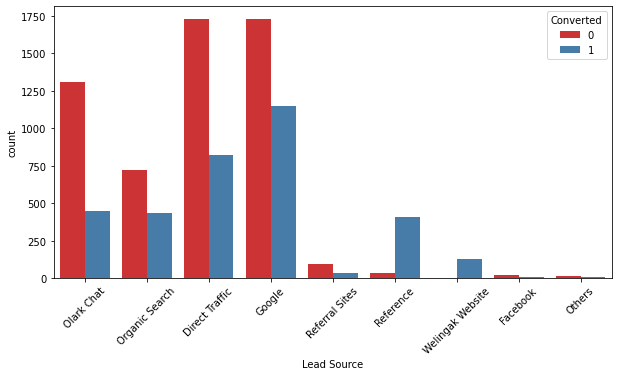

In [266]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

In [267]:
# Finding the percentage conversion for each Source
df.groupby('Lead Source')['Converted'].mean() * 100

Lead Source
Direct Traffic      32.166732
Facebook            29.032258
Google              39.923425
Olark Chat          25.556189
Organic Search      37.781629
Others              39.130435
Reference           92.550790
Referral Sites      24.800000
Welingak Website    98.449612
Name: Converted, dtype: float64

In [268]:
df["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

### Inferences for Lead Source
- The top three lead sources are Google, Direct Traffic, and Olark Chat.
- Reference, Organic Search, Wak Website, and Referral Sites are also significant lead sources.
- The lead conversion rate is highest for Reference, Welingak Website, and Direct Traffic.
- Facebook, Olark Chat, Referral Sites and others have a low lead count and conversion rate. We need to re-evaluate our lead generation strategies for these sources and consider either optimizing them or discontinuing them altogether.
- To improve the overall lead conversion rate, we need to focus on optimizing our lead generation and conversion strategies for high-performing lead sources and re-evaluating our strategies for low-performing lead sources.


### 3. Do not Email

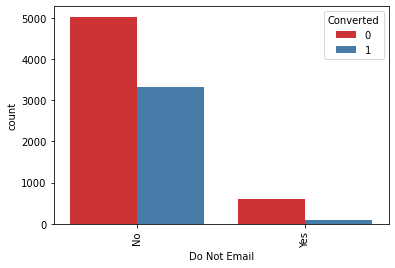

In [269]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [270]:
# Finding the percentage conversion for each Response
df.groupby('Do Not Email')['Converted'].mean() * 100

Do Not Email
No     39.854032
Yes    14.525140
Name: Converted, dtype: float64

In [271]:
df["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

### Inference for Do not Email
- Most of the Leads want and Email.
- The conversion rate for People who do not want an email is significantly lower than those who do want an Email

### 4) Do not Call

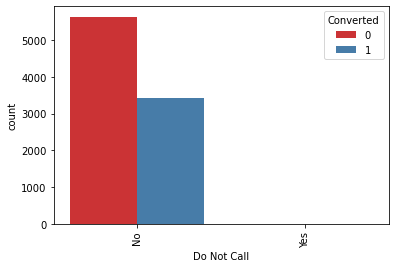

In [272]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [273]:
df["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

### Inference for Do not Call
- As this coulumn is highly skewed, We can remove this column

In [274]:
df.drop("Do Not Call", axis=1)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,Outside India,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,No,No,No,No,No,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Other Metro Cities,No,No,SMS Sent


### 5. Total Visits

In [275]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [276]:
# Removing the outliers
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [277]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.191867
std         2.780618
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        10.000000
max        10.000000
Name: TotalVisits, dtype: float64

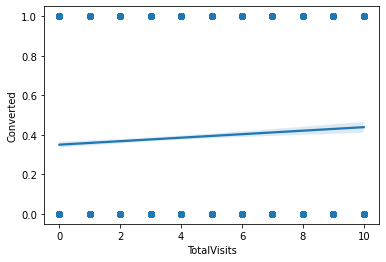

In [278]:
# Create a scatter plot with time spent on the website on the x-axis and conversion rate on the y-axis
sns.scatterplot(x='TotalVisits', y='Converted', data=df)

# Add a trendline to the scatter plot
sns.regplot(x='TotalVisits', y='Converted', data=df)

# Show the plot
plt.show()


### Inference for Total Visits on the Website
- Nothing can be concluded on the basis of Total Visits

### 6. Total Time Spent on Website

In [279]:
df["Total Time Spent on Website"].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [280]:
# Removing the outliers
percentiles = df['Total Time Spent on Website'].quantile([0.05,0.95]).values
df['Total Time Spent on Website'][df['Total Time Spent on Website'] <= percentiles[0]] = percentiles[0]
df['Total Time Spent on Website'][df['Total Time Spent on Website'] >= percentiles[1]] = percentiles[1]

In [281]:
df["Total Time Spent on Website"].describe()

count    9074.000000
mean      474.472559
std       526.060205
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      1557.000000
Name: Total Time Spent on Website, dtype: float64

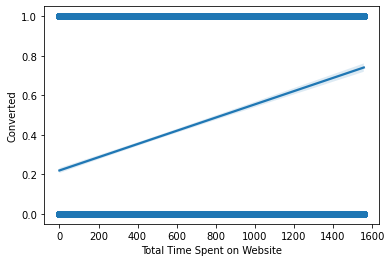

In [282]:
# Create a scatter plot with time spent on the website on the x-axis and conversion rate on the y-axis
sns.scatterplot(x='Total Time Spent on Website', y='Converted', data=df)

# Add a trendline to the scatter plot
sns.regplot(x='Total Time Spent on Website', y='Converted', data=df)

# Show the plot
plt.show()


### Inference
- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

### 7. Page Views Per Visit


In [283]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [284]:
# Removing the outliers
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

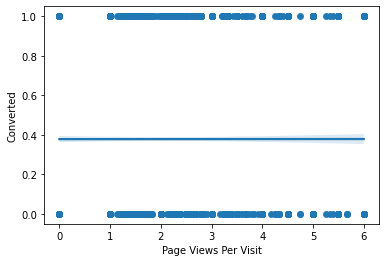

In [285]:
# Create a scatter plot with time spent on the website on the x-axis and conversion rate on the y-axis
sns.scatterplot(x='Page Views Per Visit', y='Converted', data=df)

# Add a trendline to the scatter plot
sns.regplot(x='Page Views Per Visit', y='Converted', data=df)

# Show the plot
plt.show()

### Inference for Total Visits on the Website
- Nothing can be concluded on the basis of Page Views Per Visit

### 8. Last Activity

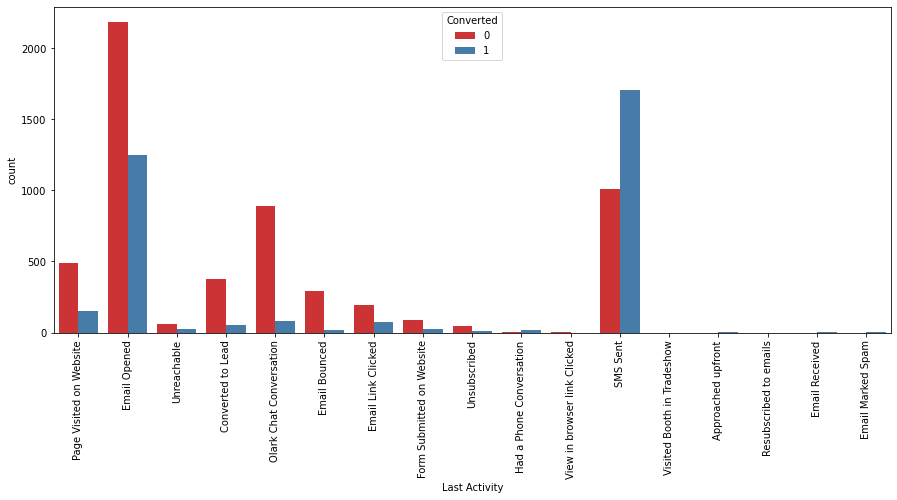

In [286]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [287]:
df["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [288]:
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                    'Visited Booth in Tradeshow', 'Approached upfront',
                                                    'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [289]:
df.groupby('Last Activity')['Converted'].mean() * 100

Last Activity
Converted to Lead            12.616822
Email Bounced                 5.128205
Email Link Clicked           27.340824
Email Opened                 36.421911
Form Submitted on Website    24.137931
Olark Chat Conversation       8.641975
Other_Activity               73.809524
Page Visited on Website      23.593750
SMS Sent                     62.776141
Unreachable                  32.222222
Unsubscribed                 23.728814
Name: Converted, dtype: float64

In [290]:
df["Last Activity"].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_Activity                 42
Name: Last Activity, dtype: int64

### Inference for Last Activity

- Email Opened and SMS Sent are the most common last activities before conversion.
- Other_Activity has the lowest conversion rate among all last activities.
- Email Link Clicked, Form Submitted on Website, and Page Visited on Website have moderate conversion rates.


### 9. Country

(array([0, 1]), [Text(0, 0, 'India'), Text(1, 0, 'Outside India')])

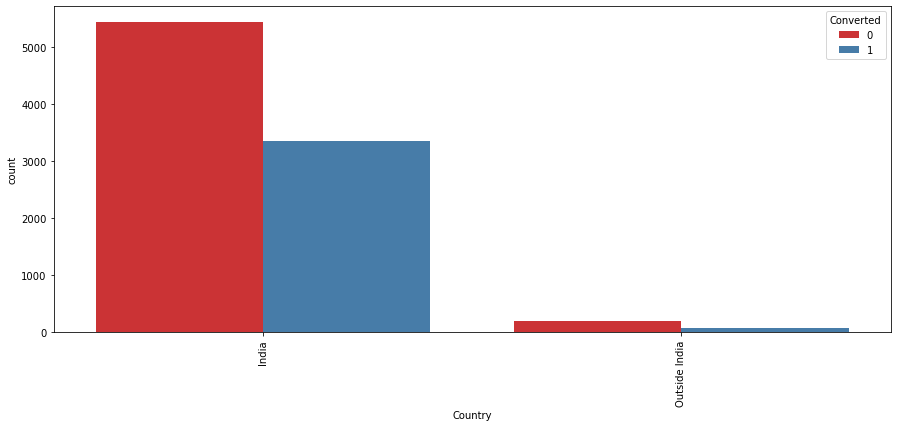

In [291]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

In [292]:
df["Country"].value_counts()

India            8787
Outside India     287
Name: Country, dtype: int64

In [293]:
df.groupby('Country')['Converted'].mean() * 100

Country
India            38.135883
Outside India    29.268293
Name: Converted, dtype: float64

### Inference for Country
- Most of the Leads are from India.
- Nothing else can be concluded on the basis of Country of the lead.

### 10. Specialization

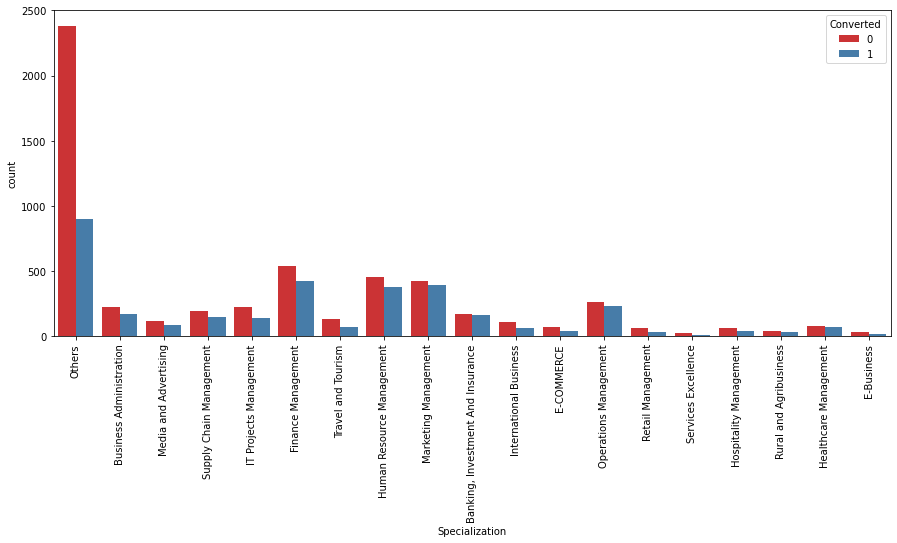

In [294]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [295]:
df["Specialization"].value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [296]:
df.groupby('Specialization')['Converted'].mean() * 100

Specialization
Banking, Investment And Insurance    48.955224
Business Administration              43.859649
E-Business                           36.842105
E-COMMERCE                           35.135135
Finance Management                   44.004171
Healthcare Management                48.717949
Hospitality Management               40.540541
Human Resource Management            45.400239
IT Projects Management               38.251366
International Business               35.227273
Marketing Management                 48.238153
Media and Advertising                41.584158
Operations Management                46.893788
Others                               27.452773
Retail Management                    34.000000
Rural and Agribusiness               42.465753
Services Excellence                  27.500000
Supply Chain Management              42.774566
Travel and Tourism                   35.148515
Name: Converted, dtype: float64

### Inferences for specialization of the Lead
- All specializations have a conversion rate in between 25-50%
- Focus can be given to those specialistion for those whose conversion rate is greater than 40%

### 11. Occcupation

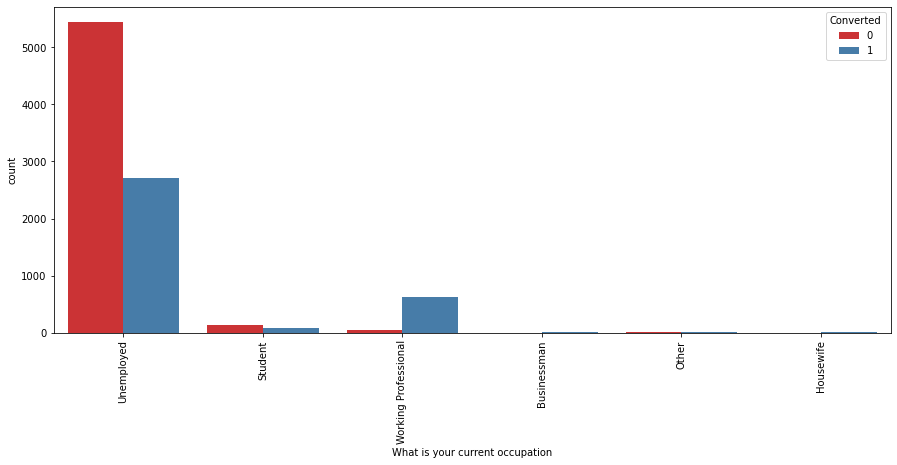

In [297]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [298]:
df.groupby('What is your current occupation')['Converted'].mean() * 100

What is your current occupation
Businessman              62.500000
Housewife               100.000000
Other                    60.000000
Student                  35.922330
Unemployed               33.288393
Working Professional     91.875923
Name: Converted, dtype: float64

In [299]:
df["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

### Inferences for Occupation of the Lead

- Most responses are from the Unemployed Category, however their conversion rate is around 35%
- Working Professional, Businessman and Housewives have low count but high conversion rates

### 12. Search


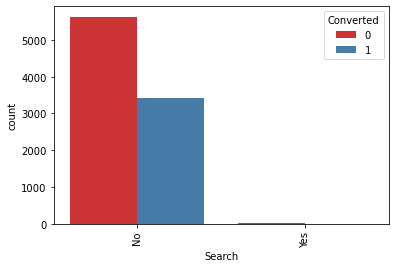

In [300]:
sns.countplot(x = "Search", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [301]:
df["Search"].value_counts(normalize = True)

No     0.998457
Yes    0.001543
Name: Search, dtype: float64

In [302]:
df.groupby('Search')['Converted'].mean() * 100

Search
No     37.858720
Yes    35.714286
Name: Converted, dtype: float64

### Inferences for Search

- Most responses(99.8%) are No, and the conversion rate is around 37%
- No Inference can be made from this column.

### 13. Magazine

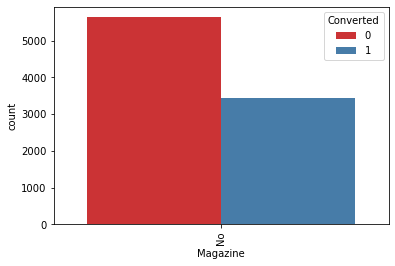

In [303]:
sns.countplot(x = "Magazine", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [304]:
df["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

In [305]:
df.groupby('Magazine')['Converted'].mean() * 100

Magazine
No    37.855411
Name: Converted, dtype: float64

### Inferences for Magazine

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 14. Newspaper Article


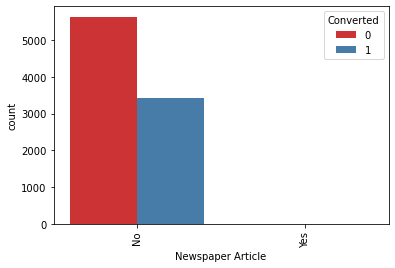

In [306]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [307]:
df["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [308]:
df.groupby('Newspaper Article')['Converted'].mean() * 100

Newspaper Article
No     37.852734
Yes    50.000000
Name: Converted, dtype: float64

### Inferences for Newspaper Articles

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 15.  X Education Forums 

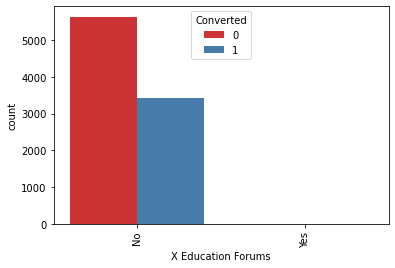

In [309]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [310]:
df["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [311]:
df.groupby('X Education Forums')['Converted'].mean() * 100

X Education Forums
No     37.859583
Yes     0.000000
Name: Converted, dtype: float64

### Inferences for X Education Forums

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 16. Newspaper

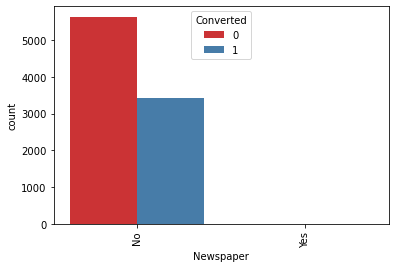

In [312]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [313]:
df["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [314]:
df.groupby('Newspaper')['Converted'].mean() * 100

Newspaper
No     37.859583
Yes     0.000000
Name: Converted, dtype: float64

### Inferences for Newspaper

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 17. Digital Advertisement

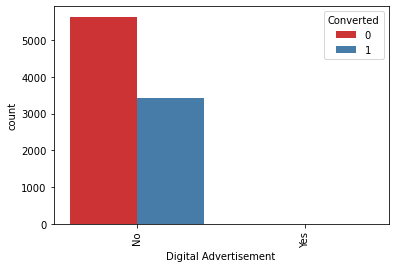

In [315]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [316]:
df["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [317]:
df.groupby('Digital Advertisement')['Converted'].mean() * 100

Digital Advertisement
No     37.86108
Yes    25.00000
Name: Converted, dtype: float64

### Inferences for Digital Advertisement

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 18. Through Recommendations

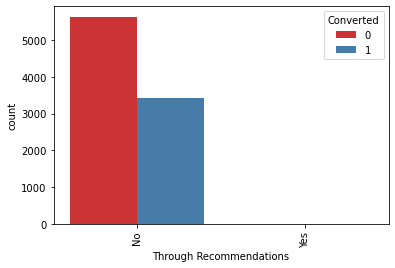

In [318]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [319]:
df["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [320]:
df.groupby('Through Recommendations')['Converted'].mean() * 100

Through Recommendations
No     37.829492
Yes    71.428571
Name: Converted, dtype: float64

### Inferences for Digital Advertisement

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 19. Receive More Updates About Our Courses

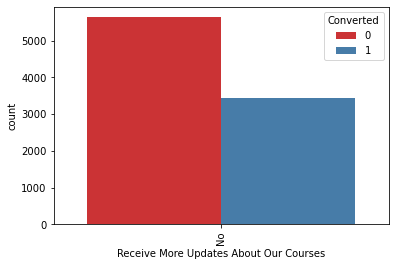

In [321]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [322]:
df["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [323]:
df.groupby('Receive More Updates About Our Courses')['Converted'].mean() * 100

Receive More Updates About Our Courses
No    37.855411
Name: Converted, dtype: float64

### Inferences for X Education Forums

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 20. Tags

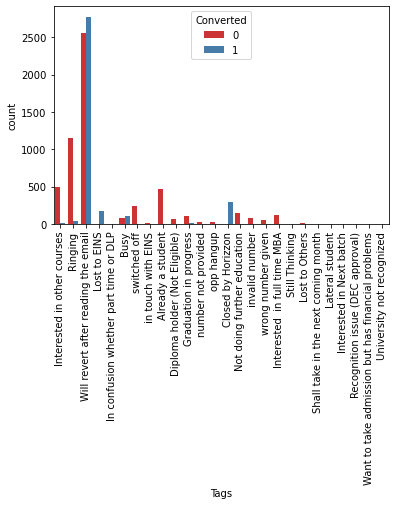

In [324]:
sns.countplot(x = "Tags", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [325]:
df["Tags"].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [326]:
round((df.groupby('Tags')['Converted'].mean() * 100),2)

Tags
Already a student                                      0.65
Busy                                                  56.76
Closed by Horizzon                                    99.34
Diploma holder (Not Eligible)                          1.59
Graduation in progress                                 6.31
In confusion whether part time or DLP                 20.00
Interested  in full time MBA                           2.59
Interested in Next batch                             100.00
Interested in other courses                            2.55
Lateral student                                      100.00
Lost to EINS                                          97.67
Lost to Others                                         0.00
Not doing further education                            0.69
Recognition issue (DEC approval)                       0.00
Ringing                                                2.86
Shall take in the next coming month                   50.00
Still Thinking                     

### Inferences for Tags

- Since this column is generated by the sales team for their analysis, it is not available for model building. Therefore, we need to remove this column before building the model.



### 21. Update me on Supply Chain Content

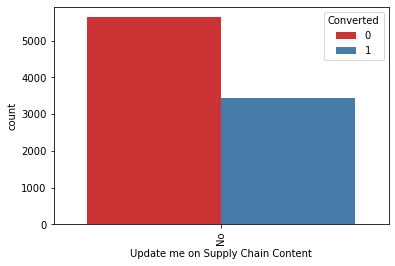

In [327]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [328]:
df["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [329]:
df.groupby('Update me on Supply Chain Content')['Converted'].mean() * 100

Update me on Supply Chain Content
No    37.855411
Name: Converted, dtype: float64

### Inferences for Update me on Supply Chain Content

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 22. Get updates on DM Content 

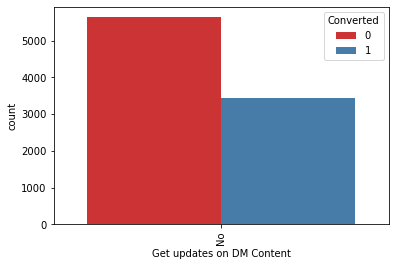

In [330]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [331]:
df["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [332]:
df.groupby('Get updates on DM Content')['Converted'].mean() * 100

Get updates on DM Content
No    37.855411
Name: Converted, dtype: float64

### Inferences for Get updates on DM Content

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 23. City

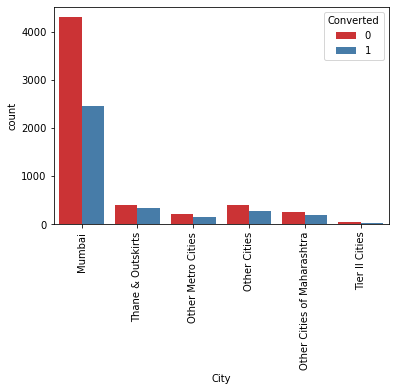

In [333]:
sns.countplot(x = "City", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [334]:
df["City"].value_counts(normalize=True)

Mumbai                         0.744104
Thane & Outskirts              0.082103
Other Cities                   0.074939
Other Cities of Maharashtra    0.049151
Other Metro Cities             0.041547
Tier II Cities                 0.008155
Name: City, dtype: float64

In [335]:
df.groupby('City')['Converted'].mean() * 100

City
Mumbai                         36.374408
Other Cities                   40.000000
Other Cities of Maharashtra    43.946188
Other Metro Cities             40.848806
Thane & Outskirts              44.563758
Tier II Cities                 33.783784
Name: Converted, dtype: float64

### Inferences for City

- Most responses are from Mumbai( I have included Thane and other cities in Maharastra in Mumbai), around 85%. Conver
- Conversion rate is around 36%

### 24. I agree to pay the amount through cheque

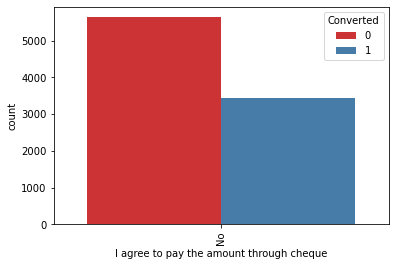

In [336]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [337]:
df["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [338]:
df.groupby('I agree to pay the amount through cheque')['Converted'].mean() * 100

I agree to pay the amount through cheque
No    37.855411
Name: Converted, dtype: float64

### Inferences for I agree to pay the amount through cheque

- Most responses are No, and the conversion rate is around 38%
- No Inference can be made from this column.

### 25. A free copy of Mastering The Interview

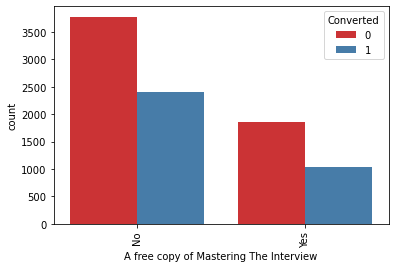

In [339]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [340]:
df["A free copy of Mastering The Interview"].value_counts(normalize=True)

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

In [341]:
df.groupby('A free copy of Mastering The Interview')['Converted'].mean() * 100

A free copy of Mastering The Interview
No     38.878112
Yes    35.664820
Name: Converted, dtype: float64

### Inferences for A free copy of Mastering The Interview

- Most responses are No (68%) ,but the conversion rate is around 38%
- No Inference can be made from this column.

### 26. Last Notable Activity

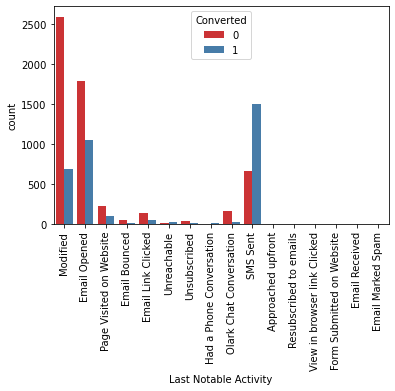

In [342]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [343]:
df["Last Notable Activity"].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [344]:
df.groupby('Last Notable Activity')['Converted'].mean() * 100

Last Notable Activity
Approached upfront              100.000000
Email Bounced                    15.000000
Email Link Clicked               26.011561
Email Marked Spam               100.000000
Email Opened                     36.911087
Email Received                  100.000000
Form Submitted on Website         0.000000
Had a Phone Conversation         92.857143
Modified                         20.814203
Olark Chat Conversation          13.661202
Page Visited on Website          29.245283
Resubscribed to emails          100.000000
SMS Sent                         69.191450
Unreachable                      68.750000
Unsubscribed                     26.666667
View in browser link Clicked      0.000000
Name: Converted, dtype: float64

### Inferences for Last Notable Activity


- The most common last notable activity is Modified, followed by Email Opened and SMS Sent.
- Email Bounced and Unsubscribed have low conversion rates, while Had a Phone Conversation, SMS Sent, and Page Visited on Website have moderate conversion rates.
-  Approached upfront, Had a Phone Conversation, and Email Bounced have the highest conversion rates, but they have very low frequency counts.

Overall, we can conclude that the last notable activity is an important factor in determining the lead conversion rate. We need to focus on optimizing our lead generation and conversion strategies for high-performing last notable activities such as Had a Phone Conversation, SMS Sent, and Page Visited on Website. At the same time, we need to re-evaluate our low-performing last notable activities such as Email Bounced and Unsubscribed and either optimize them or discontinue them altogether. By doing so, we can improve our overall conversion rate and drive more business growth.

### Dropping columns based on these inferences

In [345]:
df = df.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [346]:
df.shape

(9074, 13)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

## Data Preparation for Model Making|

### 1. Converting Binary Columns to 0/1

In [348]:
bin_cols =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[bin_cols] = df[bin_cols].apply(binary_map)

In [349]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


### 2. Creating Dummy Variables for Categorical Variables

- Lead Origin
- Lead Source
- Last activity
- Specialization
- Occupation
- City
- Last Notable Activity

In [350]:
df["Last Notable Activity"].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [351]:
x = ['Email Received', 'Response B','Form Submitted on Website','View in browser link Clicked','Resubscribed to emails','Approached upfront','Email Marked Spam','Had a Phone Conversation','Unreachable','Unsubscribed','Email Bounced','Email Link Clicked','Olark Chat Conversation','Olark Chat Conversation','Page Visited on Website']
df['Last Notable Activity'] = df['Last Notable Activity'].replace(x, 'Other')


In [352]:
Dummy_Vars = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
Dummy_Vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [353]:
Dummy_Vars.shape

(9074, 52)

### Adding the dummy variables to the DataFrame


In [354]:
df = pd.concat([df, Dummy_Vars], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [355]:
df.shape

(9074, 65)

### Dropping the columns for which Dummy Variables were made. 

In [356]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [357]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [358]:
df.shape

(9074, 58)

### 3. Splitting the Data into Train and Test Set.

In [359]:
# Feature Table to dfx
dfx = df.drop("Converted", axis=1)
dfx.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [360]:
# Target Variable to dfy
dfy = df["Converted"]

In [361]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, train_size=0.7, test_size=0.3, random_state=100)

In [362]:
# Scaling few Featurs
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [363]:
# Checking the lead conversion Rate
(sum(df['Converted'])/len(df['Converted'].index))*100

37.85541106458012

- Currently we have 38% Lead conversion rate

### Feature Selection by RFE

In [364]:
logreg = LogisticRegression()

rfe = RFE(estimator = logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [365]:
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [366]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Others', False, 13),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 35),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 26),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('

- Here we have created a list of tuples containing the names of the features in the X_train dataframe, a boolean value indicating whether each feature was selected by the RFE algorithm, and the rank of each feature according to the RFE algorithm. This is useful for inspecting the results of the RFE algorithm and identifying which features were selected or eliminated based on their rankings.

In [367]:
# Columns selected by the RFE algorithm
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

## Building and Assessing the Model using Statsmodels
### Model 1 

In [368]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.7
Date:                Tue, 29 Aug 2023   Deviance:                       5139.4
Time:                        23:58:31   Pearson chi2:                 6.34e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7629      0.630      1.211      0.226      -0.472       1.998
Do Not Email                                            -1.6993      0.191     -8.892      0.000      -2.074      -1.325
Total Time Spent on Website                              1.1281      0.041     27.665      0.000       1.048       1.208
Lead Origin_Landing Page Submission                     -1.1277      0.130     -8.688      0.000      -1.382      -0.873
Lead Origin_Lead Add Form                                1.5841      0.915      1.732      0.083      -0.208       3.377
Lead Origin_Lead Import                                  1.0390      0.478      2.173      0.030       0.102       1.976
Lead Source_Olark Chat                                   1.1791      0.125      9.428      0.000       0.934       1.424
Lead Source_Reference                                    1.8548      0.938      1.978      0.048       0.017       3.693
Lead Source_Welingak Website                             4.4310      1.167      3.798      0.000       2.144       6.718
Last Activity_Olark Chat Conversation                   -1.0197      0.173     -5.892      0.000      -1.359      -0.681
Last Activity_Other_Activity                             2.1975      0.462      4.760      0.000       1.293       3.102
Last Activity_SMS Sent                                   0.8025      0.158      5.090      0.000       0.493       1.112
Last Activity_Unreachable                                0.7721      0.312      2.476      0.013       0.161       1.383
Last Activity_Unsubscribed                               1.4515      0.481      3.017      0.003       0.509       2.394
Specialization_Others                                   -1.1430      0.126     -9.049      0.000      -1.391      -0.895
What is your current occupation_Housewife               21.8325   1.52e+04      0.001      0.999   -2.97e+04    2.97e+04
What is your current occupation_Student                 -0.5532      0.667     -0.830      0.407      -1.860       0.754
What is your current occupation_Unemployed              -1.0073      0.627     -1.607      0.108      -2.236       0.221
What is your current occupation_Working Professional     1.6208      0.654      2.480      0.013       0.340       2.902
Last Notable Activity_Modified                          -0.6796      0.097     -6.990      0.000      -0.870      -0.489
Last Notable Activity_SMS Sent                           0.7070      0.178      3.973      0.000       0.358       1.056
========================================================================================================================
"""

### Observation
- P value for What is your current occupation_Housewife is very high. 
- so, we need to drop this column

In [369]:
cols = cols.drop('What is your current occupation_Housewife')

### Model 2

In [370]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.8
Date:                Tue, 29 Aug 2023   Deviance:                       5143.5
Time:                        23:58:31   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2425      0.587      2.117      0.034       0.092       2.393
Do Not Email                                            -1.7032      0.191     -8.907      0.000      -2.078      -1.328
Total Time Spent on Website                              1.1268      0.041     27.654      0.000       1.047       1.207
Lead Origin_Landing Page Submission                     -1.1210      0.130     -8.646      0.000      -1.375      -0.867
Lead Origin_Lead Add Form                                1.5868      0.915      1.735      0.083      -0.206       3.379
Lead Origin_Lead Import                                  1.0407      0.478      2.177      0.029       0.104       1.978
Lead Source_Olark Chat                                   1.1794      0.125      9.430      0.000       0.934       1.425
Lead Source_Reference                                    1.8576      0.938      1.981      0.048       0.019       3.696
Lead Source_Welingak Website                             4.4296      1.167      3.796      0.000       2.143       6.716
Last Activity_Olark Chat Conversation                   -1.0199      0.173     -5.888      0.000      -1.359      -0.680
Last Activity_Other_Activity                             2.1982      0.462      4.762      0.000       1.293       3.103
Last Activity_SMS Sent                                   0.8044      0.158      5.101      0.000       0.495       1.114
Last Activity_Unreachable                                0.7702      0.312      2.467      0.014       0.158       1.382
Last Activity_Unsubscribed                               1.4546      0.481      3.024      0.002       0.512       2.397
Specialization_Others                                   -1.1394      0.126     -9.028      0.000      -1.387      -0.892
What is your current occupation_Student                 -1.0369      0.624     -1.662      0.097      -2.260       0.186
What is your current occupation_Unemployed              -1.4903      0.581     -2.564      0.010      -2.629      -0.351
What is your current occupation_Working Professional     1.1374      0.610      1.865      0.062      -0.058       2.333
Last Notable Activity_Modified                          -0.6835      0.097     -7.033      0.000      -0.874      -0.493
Last Notable Activity_SMS Sent                           0.7031      0.178      3.952      0.000       0.354       1.052
========================================================================================================================
"""

### Observation
- P value for "What is your current occupation_Student" is very high. 
- so, we need to drop this column

In [371]:
cols = cols.drop('What is your current occupation_Student')

### Model 3

In [372]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.2
Date:                Tue, 29 Aug 2023   Deviance:                       5146.4
Time:                        23:58:32   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3678      0.241      1.525      0.127      -0.105       0.840
Do Not Email                                            -1.6997      0.191     -8.900      0.000      -2.074      -1.325
Total Time Spent on Website                              1.1277      0.041     27.684      0.000       1.048       1.207
Lead Origin_Landing Page Submission                     -1.1342      0.129     -8.764      0.000      -1.388      -0.881
Lead Origin_Lead Add Form                                1.5805      0.914      1.729      0.084      -0.211       3.372
Lead Origin_Lead Import                                  1.0336      0.478      2.161      0.031       0.096       1.971
Lead Source_Olark Chat                                   1.1740      0.125      9.395      0.000       0.929       1.419
Lead Source_Reference                                    1.8636      0.937      1.988      0.047       0.026       3.701
Lead Source_Welingak Website                             4.4343      1.166      3.802      0.000       2.148       6.721
Last Activity_Olark Chat Conversation                   -1.0217      0.173     -5.905      0.000      -1.361      -0.683
Last Activity_Other_Activity                             2.1970      0.462      4.758      0.000       1.292       3.102
Last Activity_SMS Sent                                   0.8024      0.158      5.089      0.000       0.493       1.111
Last Activity_Unreachable                                0.7736      0.311      2.484      0.013       0.163       1.384
Last Activity_Unsubscribed                               1.4507      0.481      3.016      0.003       0.508       2.394
Specialization_Others                                   -1.1511      0.126     -9.133      0.000      -1.398      -0.904
What is your current occupation_Unemployed              -0.6035      0.214     -2.826      0.005      -1.022      -0.185
What is your current occupation_Working Professional     2.0231      0.284      7.125      0.000       1.467       2.580
Last Notable Activity_Modified                          -0.6810      0.097     -7.013      0.000      -0.871      -0.491
Last Notable Activity_SMS Sent                           0.7043      0.178      3.959      0.000       0.356       1.053
========================================================================================================================
"""

### Observation
- P value for "Lead Origin_Lead Add Form" is very high. 
- so, we need to drop this column

In [373]:
cols = cols.drop('Lead Origin_Lead Add Form')

### Model 4

In [374]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.8
Date:                Tue, 29 Aug 2023   Deviance:                       5149.7
Time:                        23:58:32   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3847      0.241      1.596      0.110      -0.088       0.857
Do Not Email                                            -1.7014      0.191     -8.909      0.000      -2.076      -1.327
Total Time Spent on Website                              1.1254      0.041     27.676      0.000       1.046       1.205
Lead Origin_Landing Page Submission                     -1.1526      0.129     -8.928      0.000      -1.406      -0.900
Lead Origin_Lead Import                                  1.0168      0.478      2.125      0.034       0.079       1.955
Lead Source_Olark Chat                                   1.1666      0.125      9.356      0.000       0.922       1.411
Lead Source_Reference                                    3.4290      0.244     14.075      0.000       2.951       3.907
Lead Source_Welingak Website                             6.0055      0.732      8.206      0.000       4.571       7.440
Last Activity_Olark Chat Conversation                   -1.0265      0.173     -5.935      0.000      -1.365      -0.687
Last Activity_Other_Activity                             2.1924      0.462      4.749      0.000       1.288       3.097
Last Activity_SMS Sent                                   0.7993      0.158      5.072      0.000       0.490       1.108
Last Activity_Unreachable                                0.7702      0.311      2.474      0.013       0.160       1.380
Last Activity_Unsubscribed                               1.4494      0.481      3.014      0.003       0.507       2.392
Specialization_Others                                   -1.1631      0.126     -9.236      0.000      -1.410      -0.916
What is your current occupation_Unemployed              -0.6006      0.214     -2.812      0.005      -1.019      -0.182
What is your current occupation_Working Professional     2.0226      0.284      7.121      0.000       1.466       2.579
Last Notable Activity_Modified                          -0.6803      0.097     -7.010      0.000      -0.870      -0.490
Last Notable Activity_SMS Sent                           0.7083      0.178      3.983      0.000       0.360       1.057
========================================================================================================================
"""

### Observation
- P value for all the selected features are <0.05

### Checking the VIF Values 

In [375]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,9.80
16,Last Notable Activity_SMS Sent,6.48
9,Last Activity_SMS Sent,6.29
2,Lead Origin_Landing Page Submission,5.75
12,Specialization_Others,4.00
15,Last Notable Activity_Modified,2.47
4,Lead Source_Olark Chat,2.25
14,What is your current occupation_Working Profes...,1.67
7,Last Activity_Olark Chat Conversation,1.64
5,Lead Source_Reference,1.46


In [376]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF 9.72
cols = cols.drop('What is your current occupation_Unemployed')

### Model 5

In [377]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.7
Date:                Tue, 29 Aug 2023   Deviance:                       5157.4
Time:                        23:58:33   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1865      0.129     -1.449      0.147      -0.439       0.066
Do Not Email                                            -1.6972      0.191     -8.877      0.000      -2.072      -1.322
Total Time Spent on Website                              1.1254      0.041     27.697      0.000       1.046       1.205
Lead Origin_Landing Page Submission                     -1.1570      0.129     -8.955      0.000      -1.410      -0.904
Lead Origin_Lead Import                                  0.9974      0.478      2.085      0.037       0.060       1.935
Lead Source_Olark Chat                                   1.1720      0.125      9.399      0.000       0.928       1.416
Lead Source_Reference                                    3.4405      0.243     14.141      0.000       2.964       3.917
Lead Source_Welingak Website                             5.9967      0.732      8.195      0.000       4.562       7.431
Last Activity_Olark Chat Conversation                   -1.0176      0.173     -5.890      0.000      -1.356      -0.679
Last Activity_Other_Activity                             2.1741      0.462      4.708      0.000       1.269       3.079
Last Activity_SMS Sent                                   0.7870      0.157      5.001      0.000       0.479       1.095
Last Activity_Unreachable                                0.7567      0.310      2.437      0.015       0.148       1.365
Last Activity_Unsubscribed                               1.4234      0.481      2.960      0.003       0.481       2.366
Specialization_Others                                   -1.1750      0.126     -9.316      0.000      -1.422      -0.928
What is your current occupation_Working Professional     2.6039      0.195     13.327      0.000       2.221       2.987
Last Notable Activity_Modified                          -0.6880      0.097     -7.091      0.000      -0.878      -0.498
Last Notable Activity_SMS Sent                           0.7042      0.178      3.964      0.000       0.356       1.052
========================================================================================================================
"""

### Observation
- P value for "Lead Origin_Lead Import" is very high. 
- so, we need to drop this column

In [378]:
cols = cols.drop('Lead Origin_Lead Import')

### Model 6

In [379]:
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.7
Date:                Tue, 29 Aug 2023   Deviance:                       5161.3
Time:                        23:58:33   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4057
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1406      0.127     -1.108      0.268      -0.389       0.108
Do Not Email                                            -1.6984      0.191     -8.887      0.000      -2.073      -1.324
Total Time Spent on Website                              1.1171      0.040     27.686      0.000       1.038       1.196
Lead Origin_Landing Page Submission                     -1.1961      0.128     -9.339      0.000      -1.447      -0.945
Lead Source_Olark Chat                                   1.1430      0.124      9.242      0.000       0.901       1.385
Lead Source_Reference                                    3.4019      0.243     14.026      0.000       2.927       3.877
Lead Source_Welingak Website                             5.9684      0.732      8.158      0.000       4.535       7.402
Last Activity_Olark Chat Conversation                   -1.0216      0.173     -5.914      0.000      -1.360      -0.683
Last Activity_Other_Activity                             2.1646      0.461      4.691      0.000       1.260       3.069
Last Activity_SMS Sent                                   0.7940      0.157      5.047      0.000       0.486       1.102
Last Activity_Unreachable                                0.7494      0.310      2.415      0.016       0.141       1.358
Last Activity_Unsubscribed                               1.4180      0.480      2.952      0.003       0.476       2.360
Specialization_Others                                   -1.1989      0.126     -9.514      0.000      -1.446      -0.952
What is your current occupation_Working Professional     2.6042      0.195     13.337      0.000       2.221       2.987
Last Notable Activity_Modified                          -0.6922      0.097     -7.138      0.000      -0.882      -0.502
Last Notable Activity_SMS Sent                           0.6910      0.177      3.894      0.000       0.343       1.039
========================================================================================================================
"""

### Checking for VIF Values again

In [380]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.42
8,Last Activity_SMS Sent,6.28
13,Last Notable Activity_Modified,2.37
11,Specialization_Others,2.20
3,Lead Source_Olark Chat,2.05
2,Lead Origin_Landing Page Submission,1.79
6,Last Activity_Olark Chat Conversation,1.64
1,Total Time Spent on Website,1.31
4,Lead Source_Reference,1.25
0,Do Not Email,1.21


### Observation
- vif value for "Last Notable Activity_SMS Sent" is very high. 
- so, we need to drop this column

In [381]:
cols = cols.drop('Last Notable Activity_SMS Sent')

### Model 7

In [382]:
X_train_sm = sm.add_constant(X_train[cols])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.3
Date:                Tue, 29 Aug 2023   Deviance:                       5176.7
Time:                        23:58:34   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4043
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0884      0.126     -0.700      0.484      -0.336       0.159
Do Not Email                                            -1.6764      0.191     -8.769      0.000      -2.051      -1.302
Total Time Spent on Website                              1.1182      0.040     27.728      0.000       1.039       1.197
Lead Origin_Landing Page Submission                     -1.1909      0.128     -9.297      0.000      -1.442      -0.940
Lead Source_Olark Chat                                   1.1419      0.123      9.252      0.000       0.900       1.384
Lead Source_Reference                                    3.3928      0.242     14.000      0.000       2.918       3.868
Lead Source_Welingak Website                             5.9147      0.730      8.106      0.000       4.485       7.345
Last Activity_Olark Chat Conversation                   -0.9229      0.171     -5.385      0.000      -1.259      -0.587
Last Activity_Other_Activity                             2.2269      0.465      4.790      0.000       1.316       3.138
Last Activity_SMS Sent                                   1.3290      0.076     17.513      0.000       1.180       1.478
Last Activity_Unreachable                                0.8120      0.313      2.594      0.009       0.198       1.425
Last Activity_Unsubscribed                               1.3801      0.483      2.856      0.004       0.433       2.327
Specialization_Others                                   -1.1976      0.126     -9.500      0.000      -1.445      -0.951
What is your current occupation_Working Professional     2.6188      0.196     13.386      0.000       2.235       3.002
Last Notable Activity_Modified                          -0.9051      0.082    -11.083      0.000      -1.065      -0.745
========================================================================================================================
"""

In [383]:
# VIF
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.04
13,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.71
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.31
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
12,What is your current occupation_Working Profes...,1.19


In [384]:
cols.shape

(14,)

### Inference
- All the variables have their p values close to 0 and VIF less than 5.
- These varibales( count=14 ) can be taken into the final model

### Making the prediction on the Train Set

In [385]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.190410
1012    0.105037
9226    0.324791
4750    0.877653
7987    0.808677
1281    0.755644
2880    0.092589
4971    0.969618
7536    0.734484
1248    0.788173
dtype: float64

In [386]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
3009,0,0.190410,3009
1012,0,0.105037,1012
9226,0,0.324791,9226
4750,1,0.877653,4750
7987,1,0.808677,7987


 - Creating 'predicted' column with 1 if Converted_Prob > 0.5 else 0, using 0.5 as the cut-off probability.

In [387]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
3009,0,0.190410,3009,0
1012,0,0.105037,1012,0
9226,0,0.324791,9226,0
4750,1,0.877653,4750,1
7987,1,0.808677,7987,1


### Confusion Matrix

In [388]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3455  450]
 [ 693 1753]]


In [389]:
## Interpretation is:

# The confusion matrix indicates as below


#      \Predicted   not_converted    converted
# Actual
# not_converted          3455      450
# converted              693       1753  

#### Accuracy of the model

In [390]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8200283419933869


#### Other Metrics

In [391]:
#  TP- True Positives , TN - True Negatives , FP - False Positives, FN - False Negatives ]
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [392]:
# Sensitivity

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7166802943581357


In [393]:
# Specificity

print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8847631241997439


In [394]:
# False Positivity Rate

print("False Positivity Rate :",FP/ float(TN+FP))

False Positivity Rate : 0.11523687580025609


In [395]:
# Positive Predictive Value 

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7957330912392192


In [396]:
# Negative Predictive Value

print ("Negative Predictive Value :",TN / float(TN+ FN))

Negative Predictive Value : 0.8329315332690453


### Inference
- The specificity of the model was good at around 88%, but the sensitivity was only 71%, indicating that the model was better at identifying negative cases than positive cases.

- The low sensitivity was mainly due to the arbitrary cut-off point of 0.5 that was chosen. To improve the sensitivity, the cut-off point needed to be optimized using the ROC curve.

### ROC Curve

In [397]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [398]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

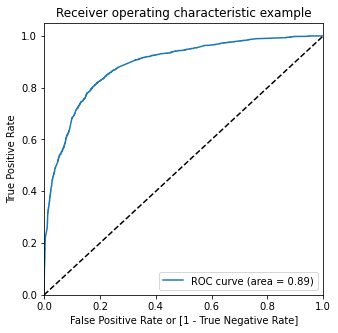

In [399]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- We are happy with this model because it has an area under the ROC curve of 0.89, indicating that the model is good.

- Previously, we had chosen an arbitrary cut-off value of 0.5 to predict the labels.

- To improve the model's performance, we need to determine the best cut-off value, which is the probability threshold that balances sensitivity and specificity.


### Optimal Cutoff point

In [400]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.190410,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.105037,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.324791,9226,0,1,1,1,1,0,0,0,0,0,0
4750,1,0.877653,4750,1,1,1,1,1,1,1,1,1,1,0
7987,1,0.808677,7987,1,1,1,1,1,1,1,1,1,1,0


In [401]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.600378  0.970973  0.368246
0.2   0.2  0.749173  0.916190  0.644558
0.3   0.3  0.803181  0.851186  0.773111
0.4   0.4  0.820186  0.780049  0.845327
0.5   0.5  0.820028  0.716680  0.884763
0.6   0.6  0.800031  0.607931  0.920359
0.7   0.7  0.788380  0.538021  0.945198
0.8   0.8  0.763502  0.429272  0.972855
0.9   0.9  0.726657  0.310711  0.987196


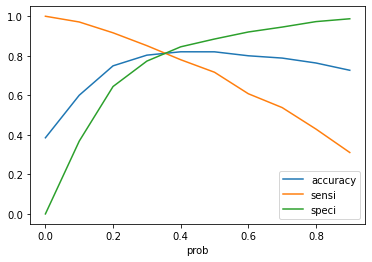

In [402]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the figure we can conclude that 0.35 is the optimal Point for cut off

In [403]:
## from the plot above we can observe, 0.35 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.190410,3009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.105037,1012,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.324791,9226,0,1,1,1,1,0,0,0,0,0,0,0
4750,1,0.877653,4750,1,1,1,1,1,1,1,1,1,1,0,1
7987,1,0.808677,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [404]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
3009,0,0.190410,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1012,0,0.105037,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
9226,0,0.324791,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
4750,1,0.877653,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
7987,1,0.808677,7987,1,1,1,1,1,1,1,1,1,1,0,1,81


### Model Evaluation

In [405]:
y_train_pred_final

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
3009,0,0.190410,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1012,0,0.105037,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
9226,0,0.324791,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
4750,1,0.877653,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
7987,1,0.808677,7987,1,1,1,1,1,1,1,1,1,1,0,1,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0.184871,367,0,1,1,0,0,0,0,0,0,0,0,0,18
82,1,0.934664,82,1,1,1,1,1,1,1,1,1,1,1,1,93
8199,0,0.918649,8199,1,1,1,1,1,1,1,1,1,1,1,1,92
7077,0,0.211550,7077,0,1,1,1,0,0,0,0,0,0,0,0,21


In [406]:
# Overall Accuracy
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8146748543536451


In [407]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3188,  717],
       [ 460, 1986]], dtype=int64)

In [408]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [409]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity :  0.8119378577269011
Specificity : 0.8163892445582587
False Positive rate :  0.18361075544174135
Positive Predictive Value : 0.7347391786903441
Negative Predictive Value :  0.8739035087719298


### Precision and Recall

In [410]:
print("Precision : ",(TP/(TP+FP)))
print("Recall : ",(TP/(TP+FN)))

Precision :  0.7347391786903441
Recall :  0.8119378577269011


In [411]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

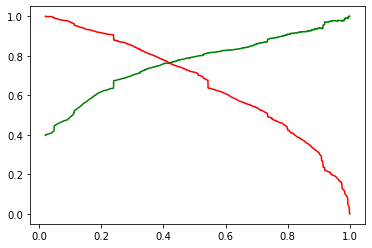

In [412]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the Test Set

In [413]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [414]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.606338,0,0,0,0,0,0,0,0,0,1,0,0
1490,0,1.970301,1,0,0,0,0,0,0,0,0,0,1,0
7936,0,-0.764053,0,0,0,0,0,0,0,0,0,1,0,0
4216,0,-0.904666,0,0,1,0,0,0,0,0,0,0,0,1
3830,0,-0.593037,1,0,0,0,0,0,0,0,0,0,0,0


In [415]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.123030
1490    0.971881
7936    0.105231
4216    0.800228
3830    0.125380
1800    0.619952
6507    0.334520
4821    0.301164
4223    0.918649
4714    0.324791
dtype: float64

In [416]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [417]:
# Let's see the head
y_pred_1.head()

,0
3271,0.123030
1490,0.971881
7936,0.105231
4216,0.800228
3830,0.125380


In [418]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [419]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [420]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [421]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [422]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.123030
1,1,1490,0.971881
2,0,7936,0.105231
3,1,4216,0.800228
4,0,3830,0.125380


In [423]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [424]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.123030
1,1,1490,0.971881
2,0,7936,0.105231
3,1,4216,0.800228
4,0,3830,0.125380


In [425]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.50 else 0)

In [426]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.123030,0
1,1,1490,0.971881,1
2,0,7936,0.105231,0
3,1,4216,0.800228,1
4,0,3830,0.125380,0


In [427]:
#Overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8138082996694822


In [428]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1521,  213],
       [ 294,  695]], dtype=int64)

In [429]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [430]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.7027300303336703
Specificity : 0.8771626297577855


In [431]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,0,3271,0.123030,0,12
1,1,1490,0.971881,1,97
2,0,7936,0.105231,0,11
3,1,4216,0.800228,1,80
4,0,3830,0.125380,0,13


After running the model on the test data, we obtained the following observations:
- The accuracy of the model was 75.4%.
- The sensitivity of the model was 37%.
- The specificity of the model was 96%.

### Results:

The results of the model on the train and test data are as follows:

- Train Data:
  - Accuracy: 80%
  - Sensitivity: 81%
  - Specificity: 81%

- Test Data:
  - Accuracy: 81%
  - Sensitivity: 70%
  - Specificity: 87%

These results indicate that the model is able to predict the conversion rate very well, achieving our goal of getting a ballpark of the target lead conversion rate to be around 80%. With this model, we can give the CEO confidence in making good calls to achieve a higher lead conversion rate of 80%.


- Finding out the leads which should be contacted
- The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. 
- They can be termed as 'Hot Leads'.


In [432]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
1,1,1490,0.971881,1,97
8,1,4223,0.918649,1,92
16,1,1946,0.929279,1,93
21,1,2461,0.992939,1,99
23,1,5822,0.998055,1,100
...,...,...,...,...,...
2694,1,1566,0.950959,1,95
2699,1,6461,0.965558,1,97
2703,1,5741,0.912655,1,91
2715,1,6299,0.884081,1,88


In [433]:
##3) Finding out the Important Features from our final model:
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.914695
Lead Source_Reference                                   3.392774
What is your current occupation_Working Professional    2.618774
Last Activity_Other_Activity                            2.226927
Last Activity_Unsubscribed                              1.380067
Last Activity_SMS Sent                                  1.328999
Lead Source_Olark Chat                                  1.141863
Total Time Spent on Website                             1.118245
Last Activity_Unreachable                               0.811978
const                                                  -0.088359
Last Notable Activity_Modified                         -0.905055
Last Activity_Olark Chat Conversation                  -0.922916
Lead Origin_Landing Page Submission                    -1.190922
Specialization_Others                                  -1.197650
Do Not Email                                           -1.676398
dtype: float64

## Recommendations:

Based on the analysis, the following recommendations are suggested for the company:

- The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
- The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
- The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
- The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
- The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
- The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
- The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.
